# **Introducing**



In the realm of strategic marketing, the present case necessitates the development of a comprehensive customer segmentation strategy. This undertaking revolves around a sample dataset encapsulating the usage behaviors of approximately 9000 active credit card holders over the past six months. The dataset, structured at a customer level, comprises 18 behavioral variables, each shedding light on diverse aspects of the credit card holders' financial interactions. This mosaic of data provides a fertile ground for the formulation of a targeted marketing approach, aimed at enhancing customer satisfaction and optimizing promotional endeavors. With 8950 instances detailing the intricacies of customer credit card profiles, the imminent task involves distilling actionable insights to guide effective marketing strategies.

To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from credit card dataset for clustering. This dataset consists of 8950 rows and 18 columns.

# **Import Libraries**

The libraries needed to model a linear regression include numpy, pandas, matplotlib, seaborn, scipy, dython nominal, factor_analyzer, yellowbrick.cluster and sklearn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use(["ggplot"])

from scipy.stats import gaussian_kde,f_oneway
from scipy.integrate import simps
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle

Preventing warnings from being displayed in the output

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

The required dataset will be read by the program.

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display the number of rows and columns.

In [4]:
df.shape

(8950, 18)

Summary information about the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Summary of descriptive statistics from DataFrame

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


# **Data Cleaning**

Data cleaning aims to identify, handle, and clean problems in the dataset. In this program, letters in columns become lowercase.

In [7]:
df.columns = df.columns.str.lower()

The *cust_id* feature can be dropped as it is unique for every row.

In [8]:
df = df.drop("cust_id",axis=1)

Contains information about the number of null values ​​for each column of the DataFrame. The columns with the most null values ​​at the top and ordered in descending order.

In [9]:
df_null=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
df_null.index.name='Columns'
df_null.columns=['Null Values']
df_null.reset_index()

,Columns,Null Values
0,minimum_payments,313
1,credit_limit,1
2,balance,0
3,cash_advance_frequency,0
4,prc_full_payment,0
5,payments,0
6,purchases_trx,0
7,cash_advance_trx,0
8,purchases_installments_frequency,0
9,balance_frequency,0


Removes rows containing null values and resets the DataFrame index after the removal

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)

# **Data Exploration**

Calculate the Pearson correlation between every feature.

The variables are exclusively numeric, Pearson correlation, as implemented through df.corr(), is employed for the analysis

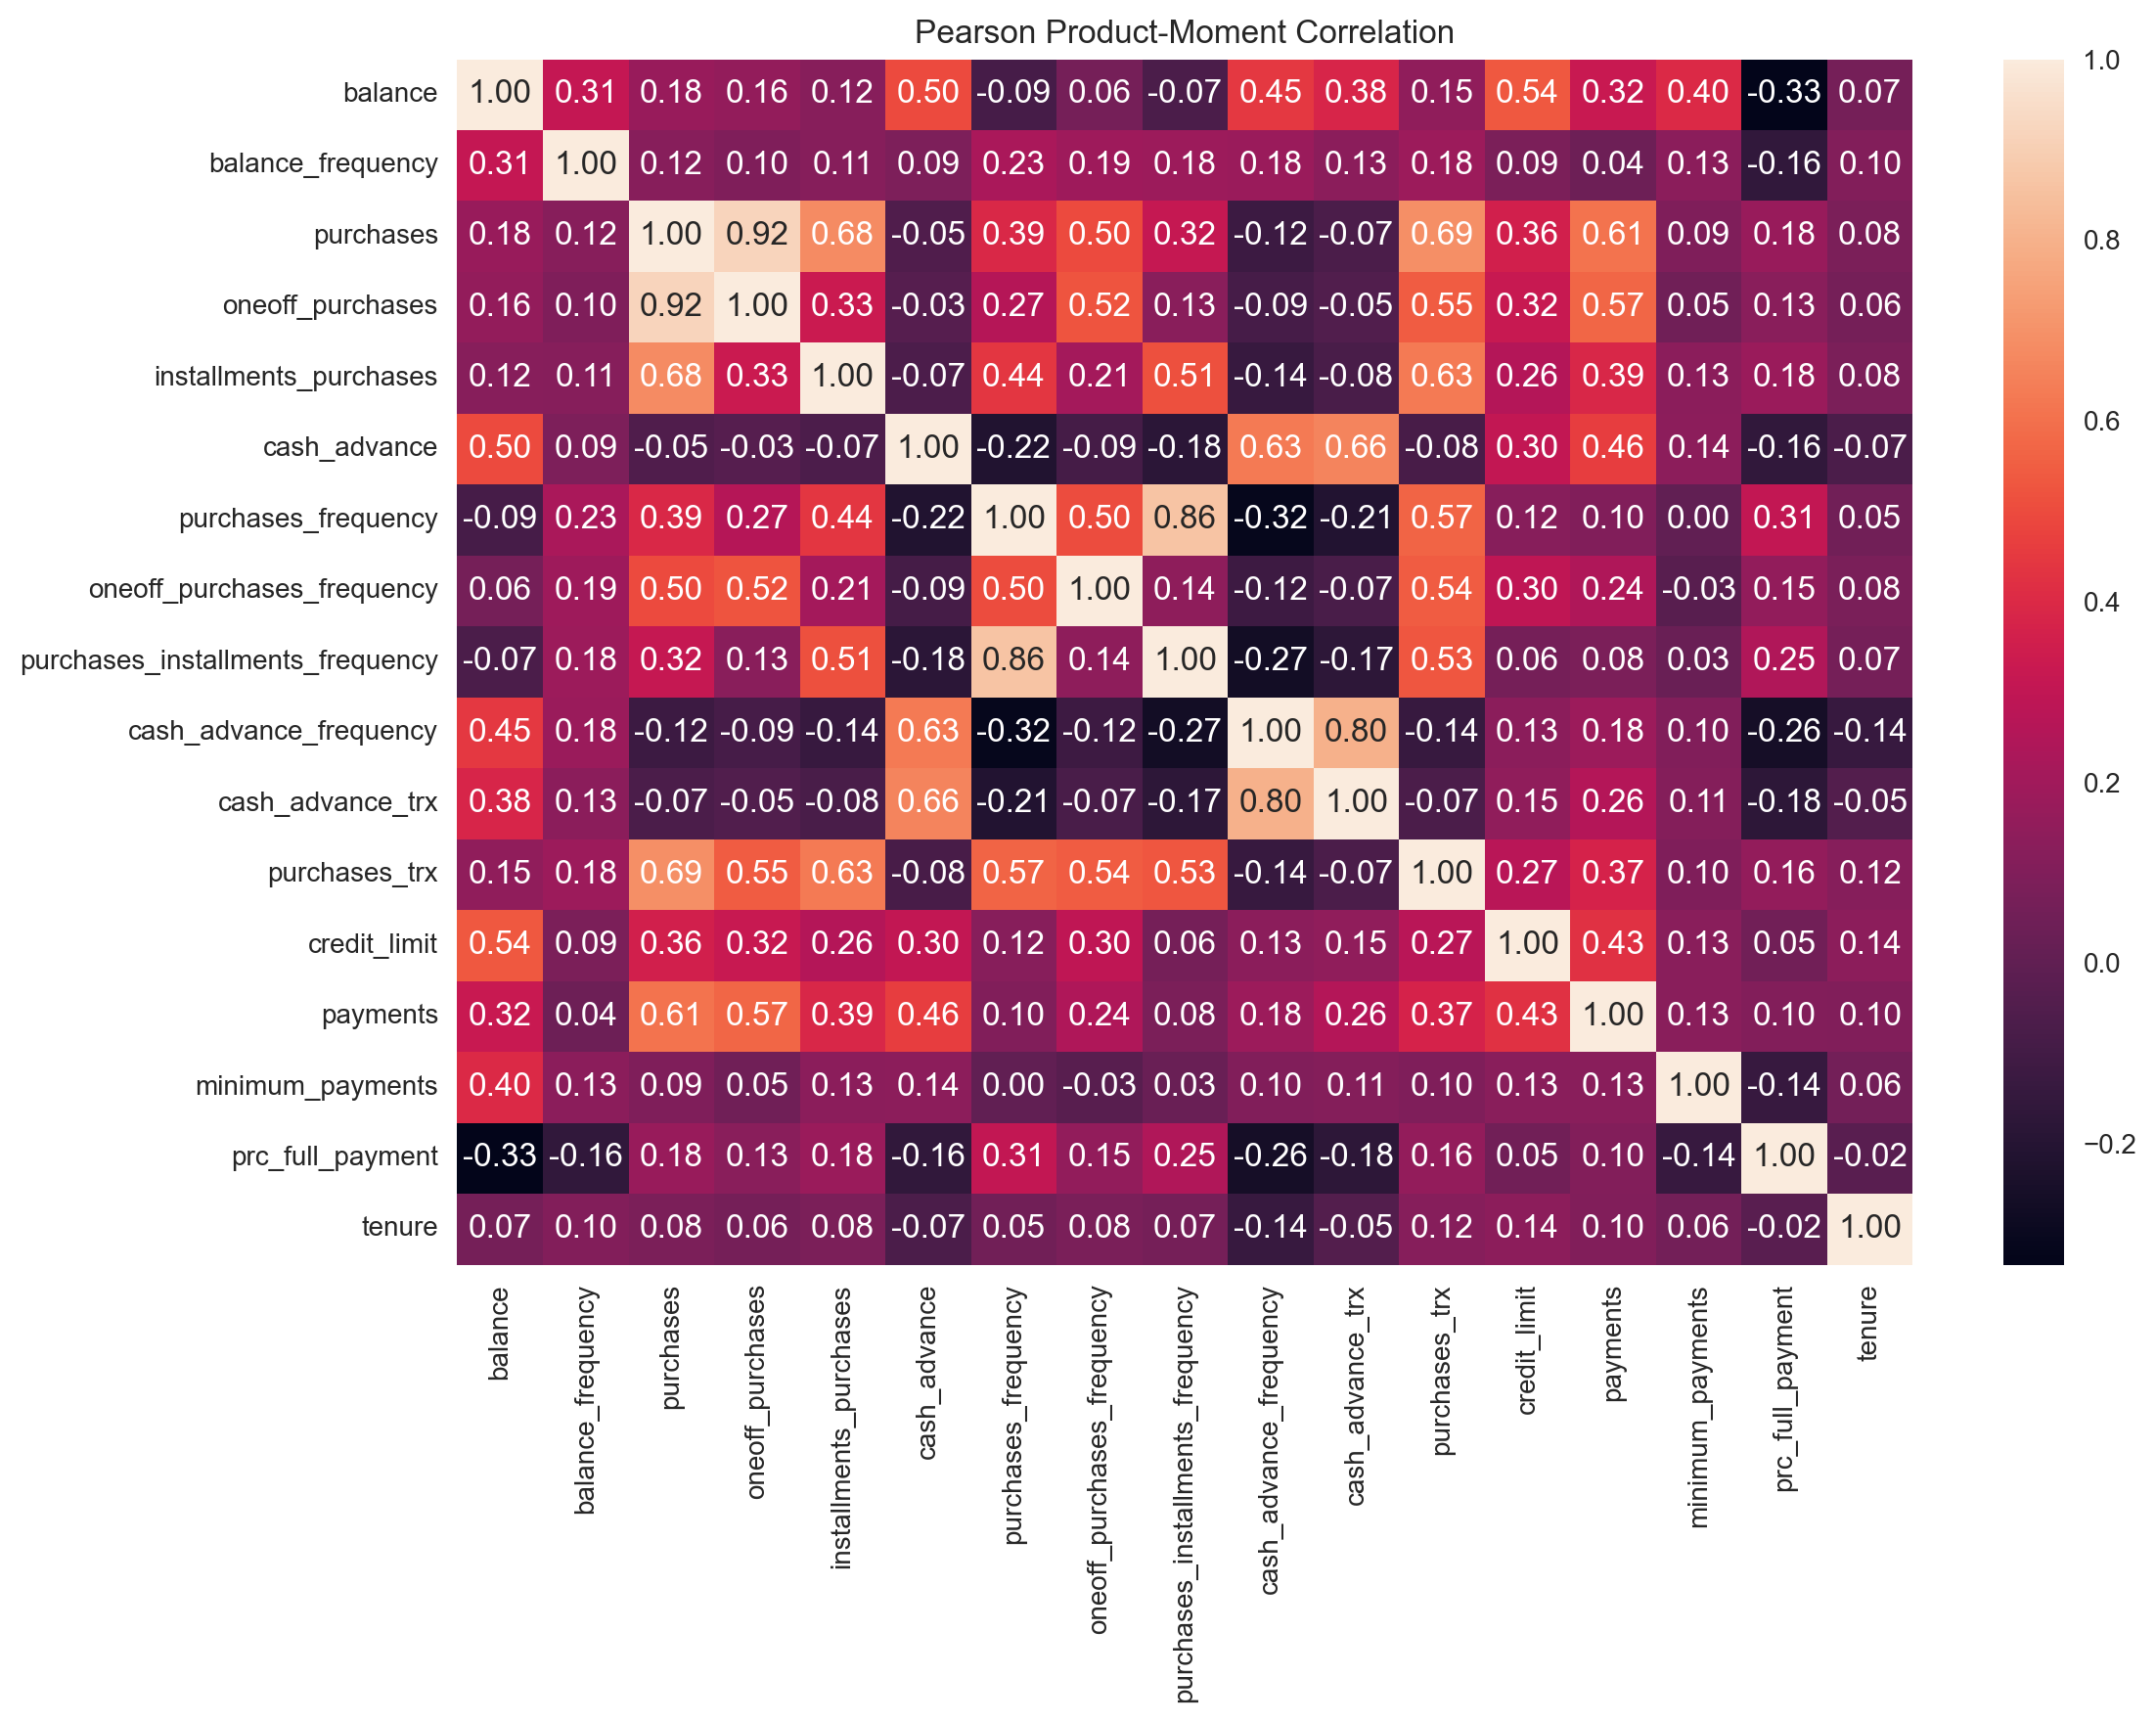

In [11]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
sns.heatmap(ax=ax,data=df.corr(),cmap="rocket",annot=True,fmt=".2f")
ax.set_title("Pearson Product-Moment Correlation")
plt.show()

The total balance of customers who purchase the most frequently (let's set a threshold at 0.8) accounts for 32.49% of the total balance of all customers.

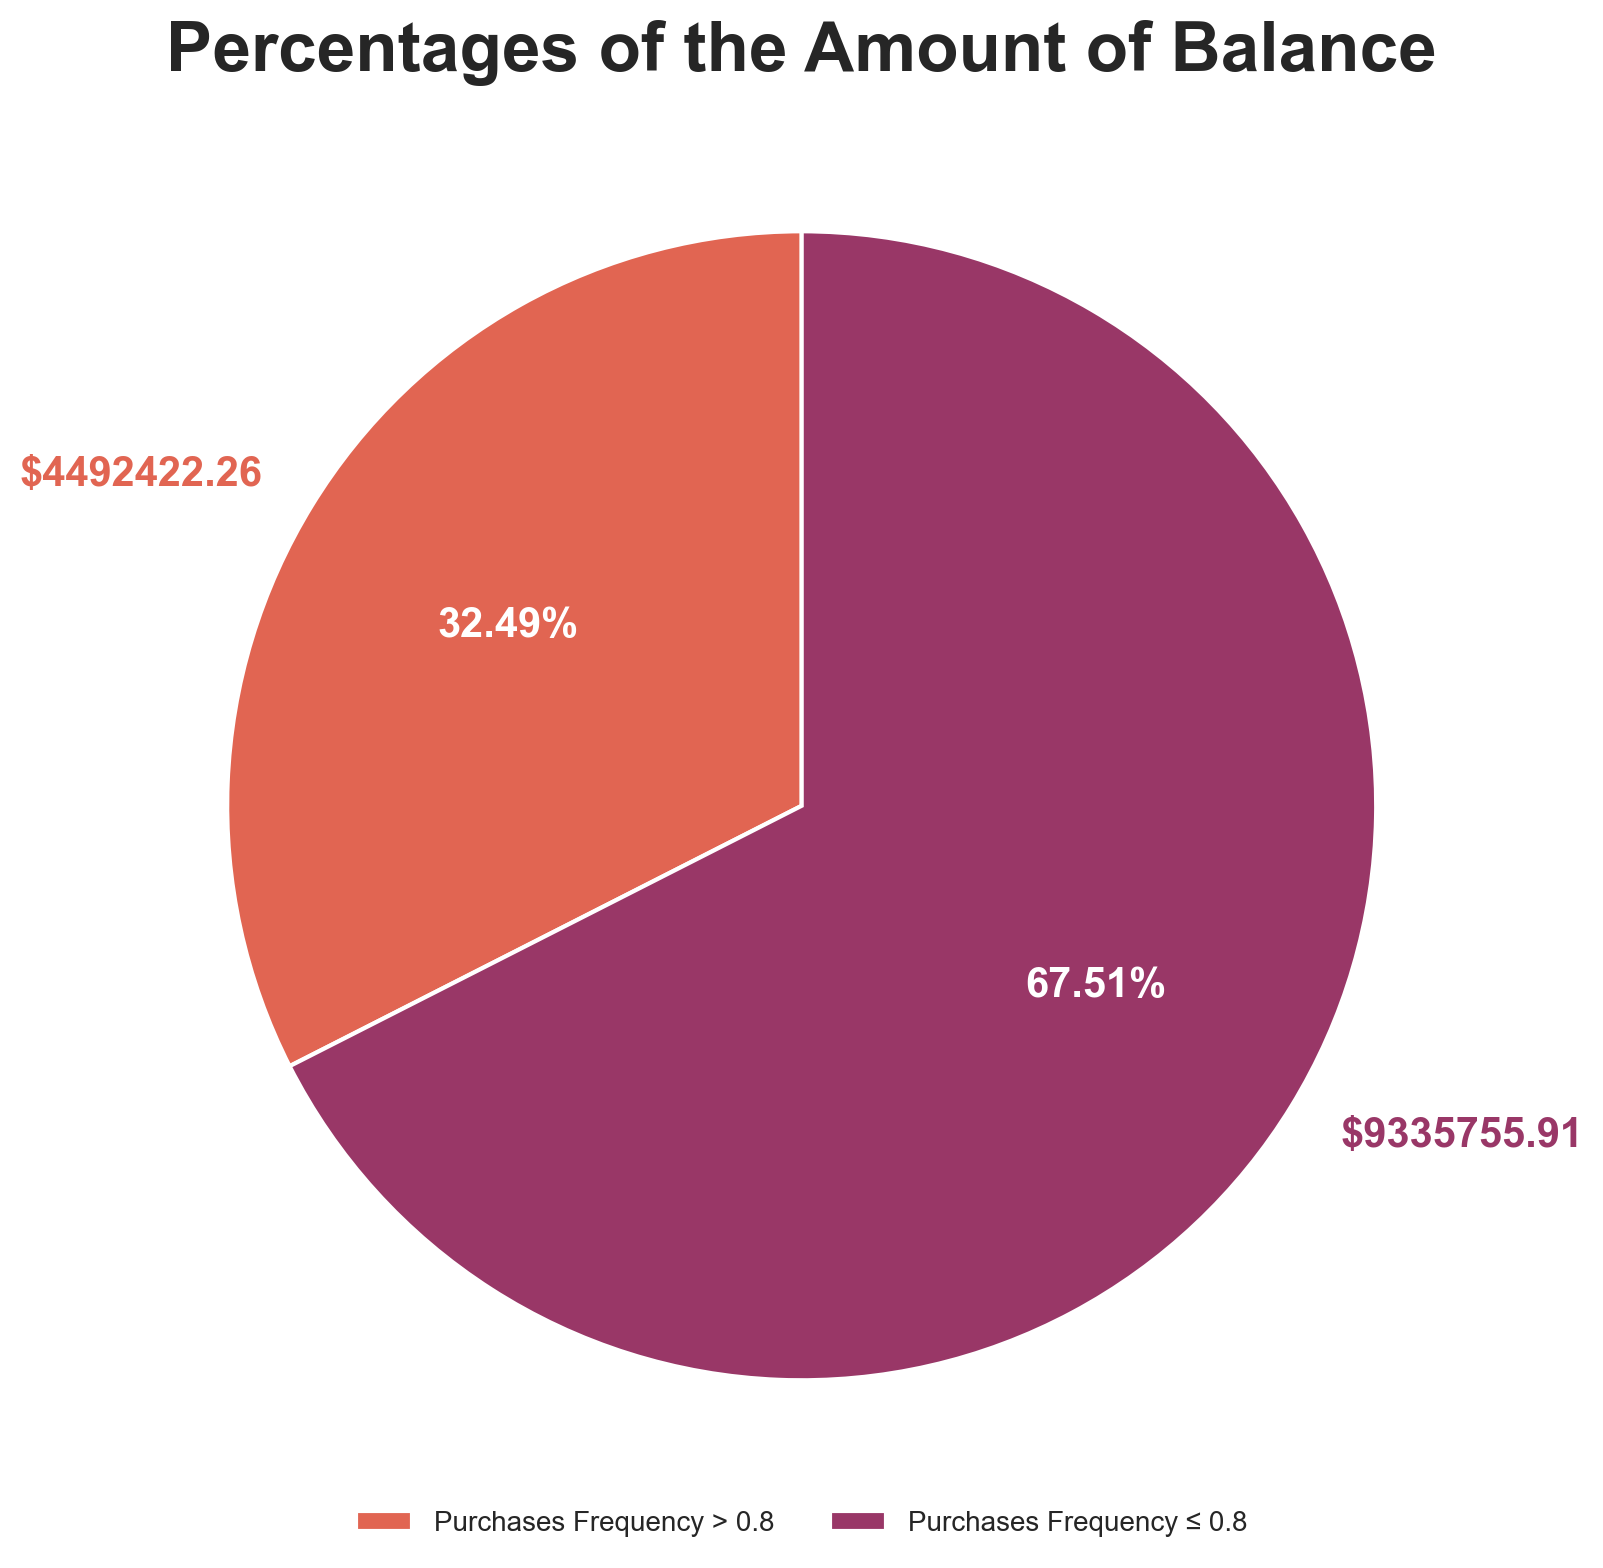

In [12]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
patches,texts,pcts = ax.pie(
    [df[df["purchases_frequency"] > 0.8]["balance"].sum(),df[df["purchases_frequency"] <= 0.8]["balance"].sum()],
    labels=[f'${round(df[df["purchases_frequency"] > 0.8]["balance"].sum(),2)}',f'${round(df[df["purchases_frequency"] <= 0.8]["balance"].sum(),2)}'],
    startangle=90, colors=["#e16552","#993767"], autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax.set_title("Percentages of the Amount of Balance",size=25,fontweight="bold")
ax.legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())

plt.setp(pcts,color="white",fontweight="bold",size=15)
plt.setp(texts,fontweight="bold",size=15)
plt.tight_layout()
plt.show()

The frequency distribution of customers who make purchases most frequently (let's set a threshold at 0.8) constitutes 34.99% of the total balance across all customers

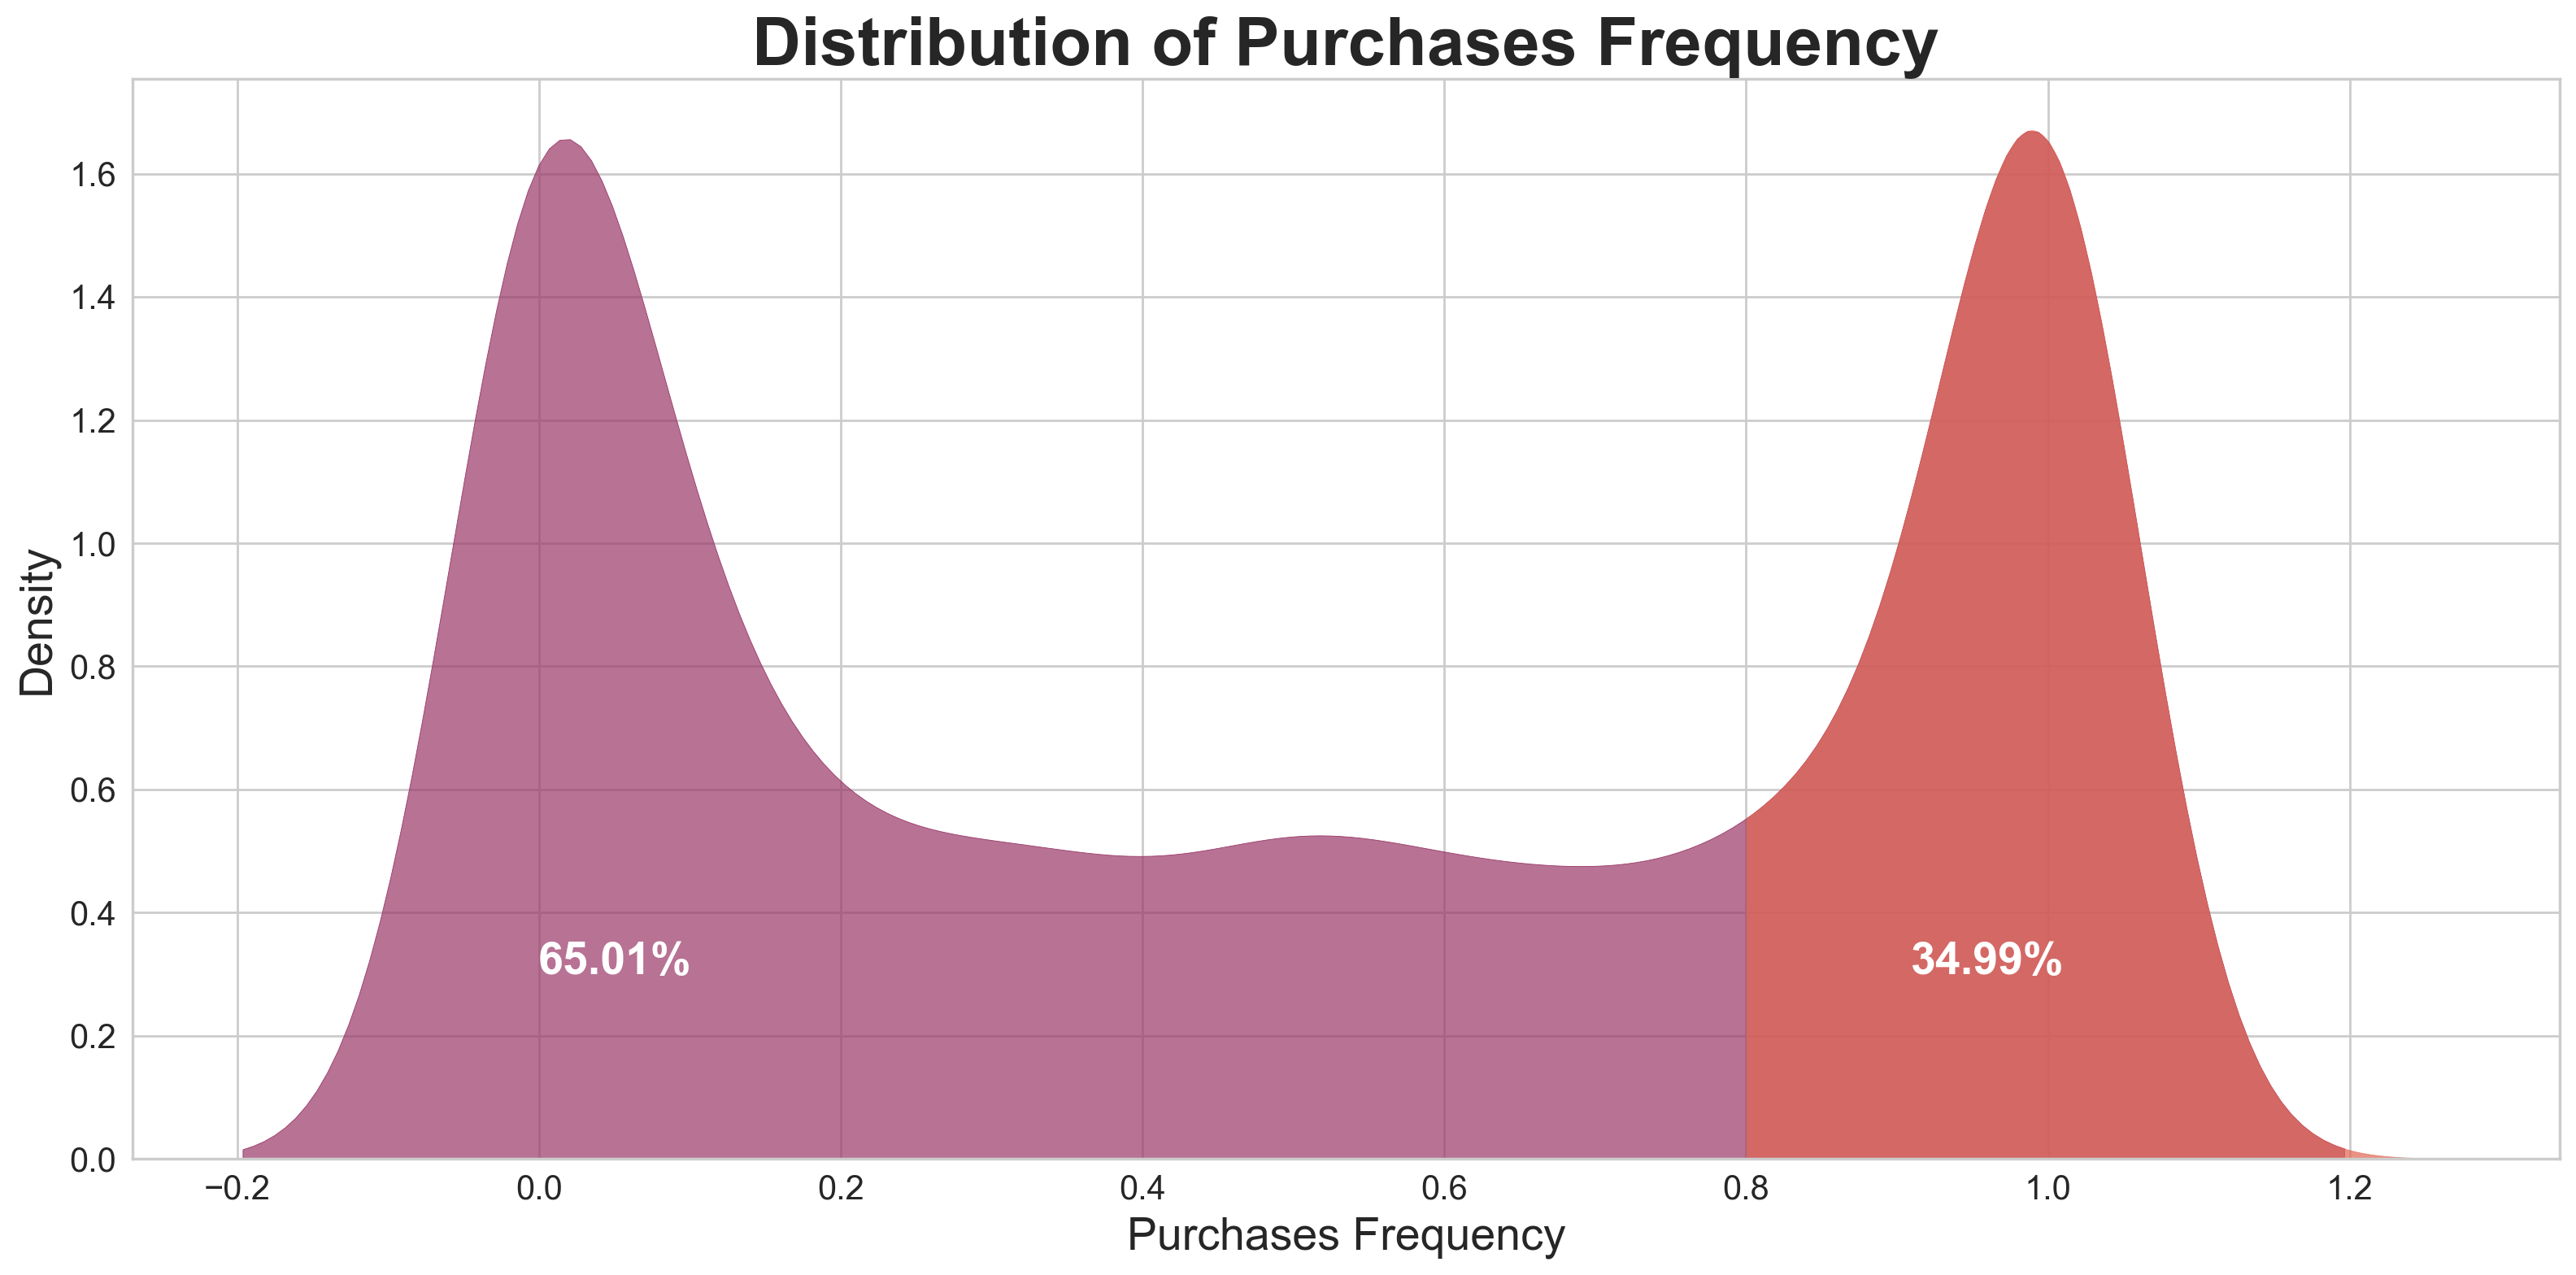

In [13]:
fig,ax = plt.subplots(figsize=(16,8),dpi=200)

kde_plot = sns.kdeplot(ax=ax,data=df,x="purchases_frequency",color="#993767",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["purchases_frequency"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#e16552",alpha=0.7)

ax.text(x=0.96, y=0.3, horizontalalignment="center",
        s=f"{round(len(df[df['purchases_frequency'] > 0.8])/len(df)*100,2)}%",
        color="white", fontweight="bold", fontsize=20)
ax.text(x=0.05, y=0.3, horizontalalignment="center",
        s=f"{round(len(df[df['purchases_frequency'] <= 0.8])/len(df)*100,2)}%",
        color="white", fontweight="bold", fontsize=20)

ax.set_title("Distribution of Purchases Frequency",size=30,fontweight="bold")
ax.set_xlabel("Purchases Frequency",size=20,labelpad=5)
ax.set_ylabel("Density",size=20,labelpad=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

# **Data Pre-processing**

Standardizing data involves applying StandardScaler to normalize the data, where each feature of our data must be normally distributed, resulting in scaling the distribution to have a mean of zero and a standard deviation of one.

In [14]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

Create a scaled DataFrame

In [15]:
feat_cols = ['feature_' + str(i+1) for i in range(scaled_df.shape[1])]
normalized_df = pd.DataFrame(scaled_df, columns=feat_cols)
normalized_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Performs dimensionality reduction using PCA, specifically reducing the number of features to 2

In [16]:
p=2
pca = PCA(n_components = p)
principal_df = pca.fit_transform(normalized_df)

pca_cols = ['P' + str(i+1) for i in range(p)]
pca_df = pd.DataFrame(principal_df,columns=pca_cols)
pca_df.head()

,P1,P2
0,-1.696396,-1.122582
1,-1.215679,2.435636
2,0.935851,-0.385206
3,-1.614639,-0.724585
4,0.223699,-0.783613


Explained variation for each principal component obtained from the Principal Component Analysis (PCA) process

In [17]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27231177 0.20374308]


Displaying PCA and purchases frequency as examples

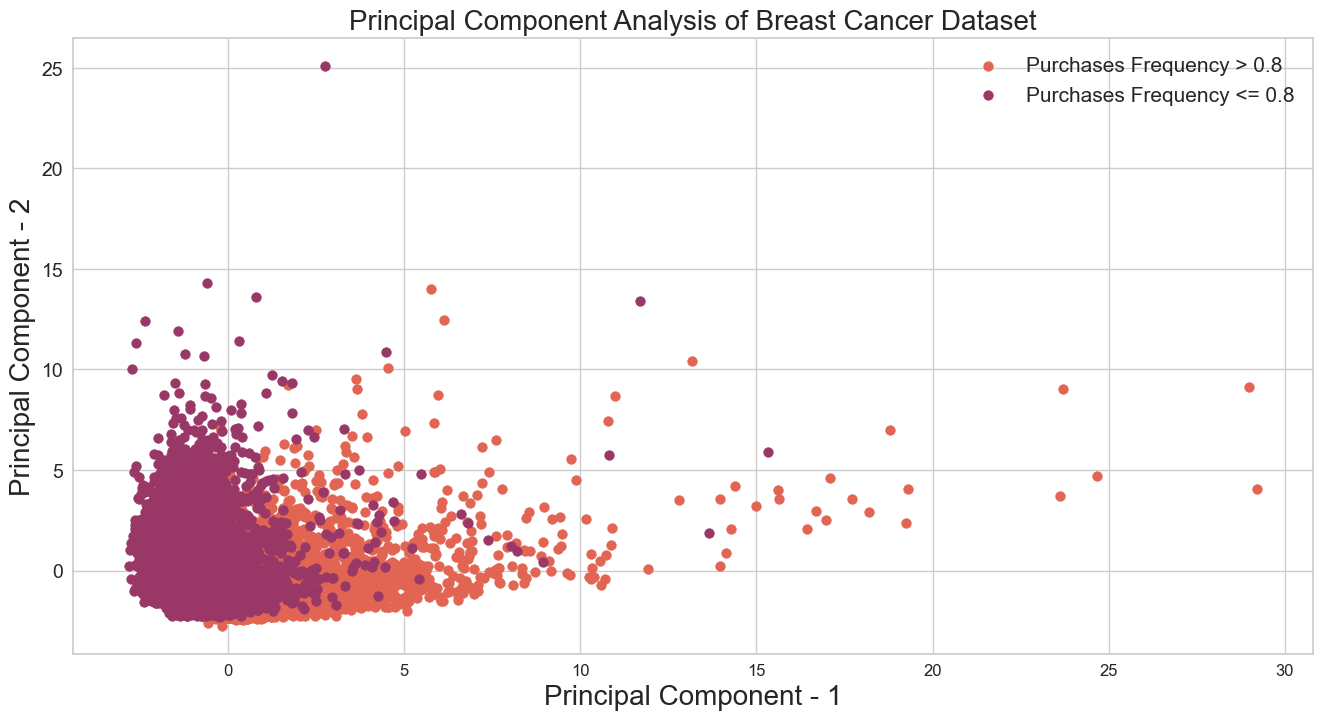

In [18]:
plt.figure(figsize=(16, 8))

plt.scatter(pca_df.loc[df["purchases_frequency"] > 0.8, 'P1'],
            pca_df.loc[df["purchases_frequency"] > 0.8, 'P2'],
            c="#e16552", s=50, label='Purchases Frequency > 0.8')

plt.scatter(pca_df.loc[df["purchases_frequency"] <= 0.8, 'P1'],
            pca_df.loc[df["purchases_frequency"] <= 0.8, 'P2'],
            c="#993767", s=50, label='Purchases Frequency <= 0.8')

plt.legend(prop={'size': 15})
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)
plt.show()

The elbow method and the silhouette method are two different approaches that can be used to determine the optimal number of clusters in a k-means clustering analysis. The elbow method is based on the within-cluster sum of squared distances (WCSS), while the silhouette method is based on the silhouette coefficient, which measures the similarity of an observation to its own cluster compared to other clusters. We can use the *yellowbrick* library to create the visualization. It appears that the optimal k is at the numbers 2 and 5.

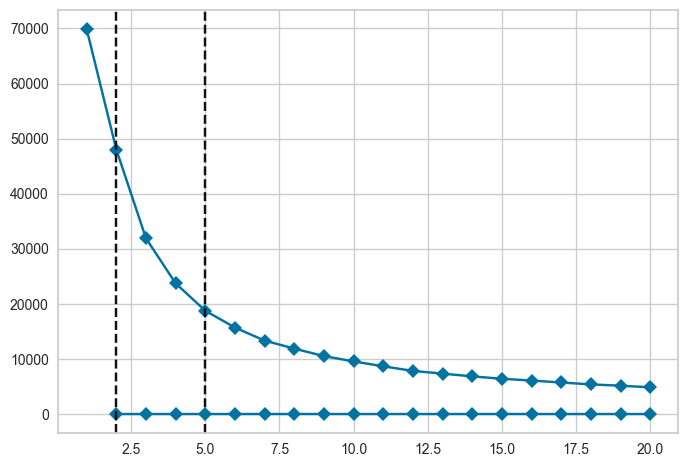

In [19]:
random_state = 42
start = 1
end = 20

scores,elbows_indexes,elbows_scores = [],[],[]
methods=["distortion","silhouette"]
for method in methods:
    if method == "silhouette":
        start = 2

    kmeans_model = KMeans(init="k-means++",random_state=random_state)
    visualizer = KElbowVisualizer(kmeans_model,k=(start,end + 1),metric=method,timings=False)
    visualizer.fit(pca_df)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

This step is optional. By employing the elbow method, the optimal k is determined to be 5. Since the visualization created by the yellowbrick library lacks customization, we can recreate the visualization using the matplotlib library to make it better.

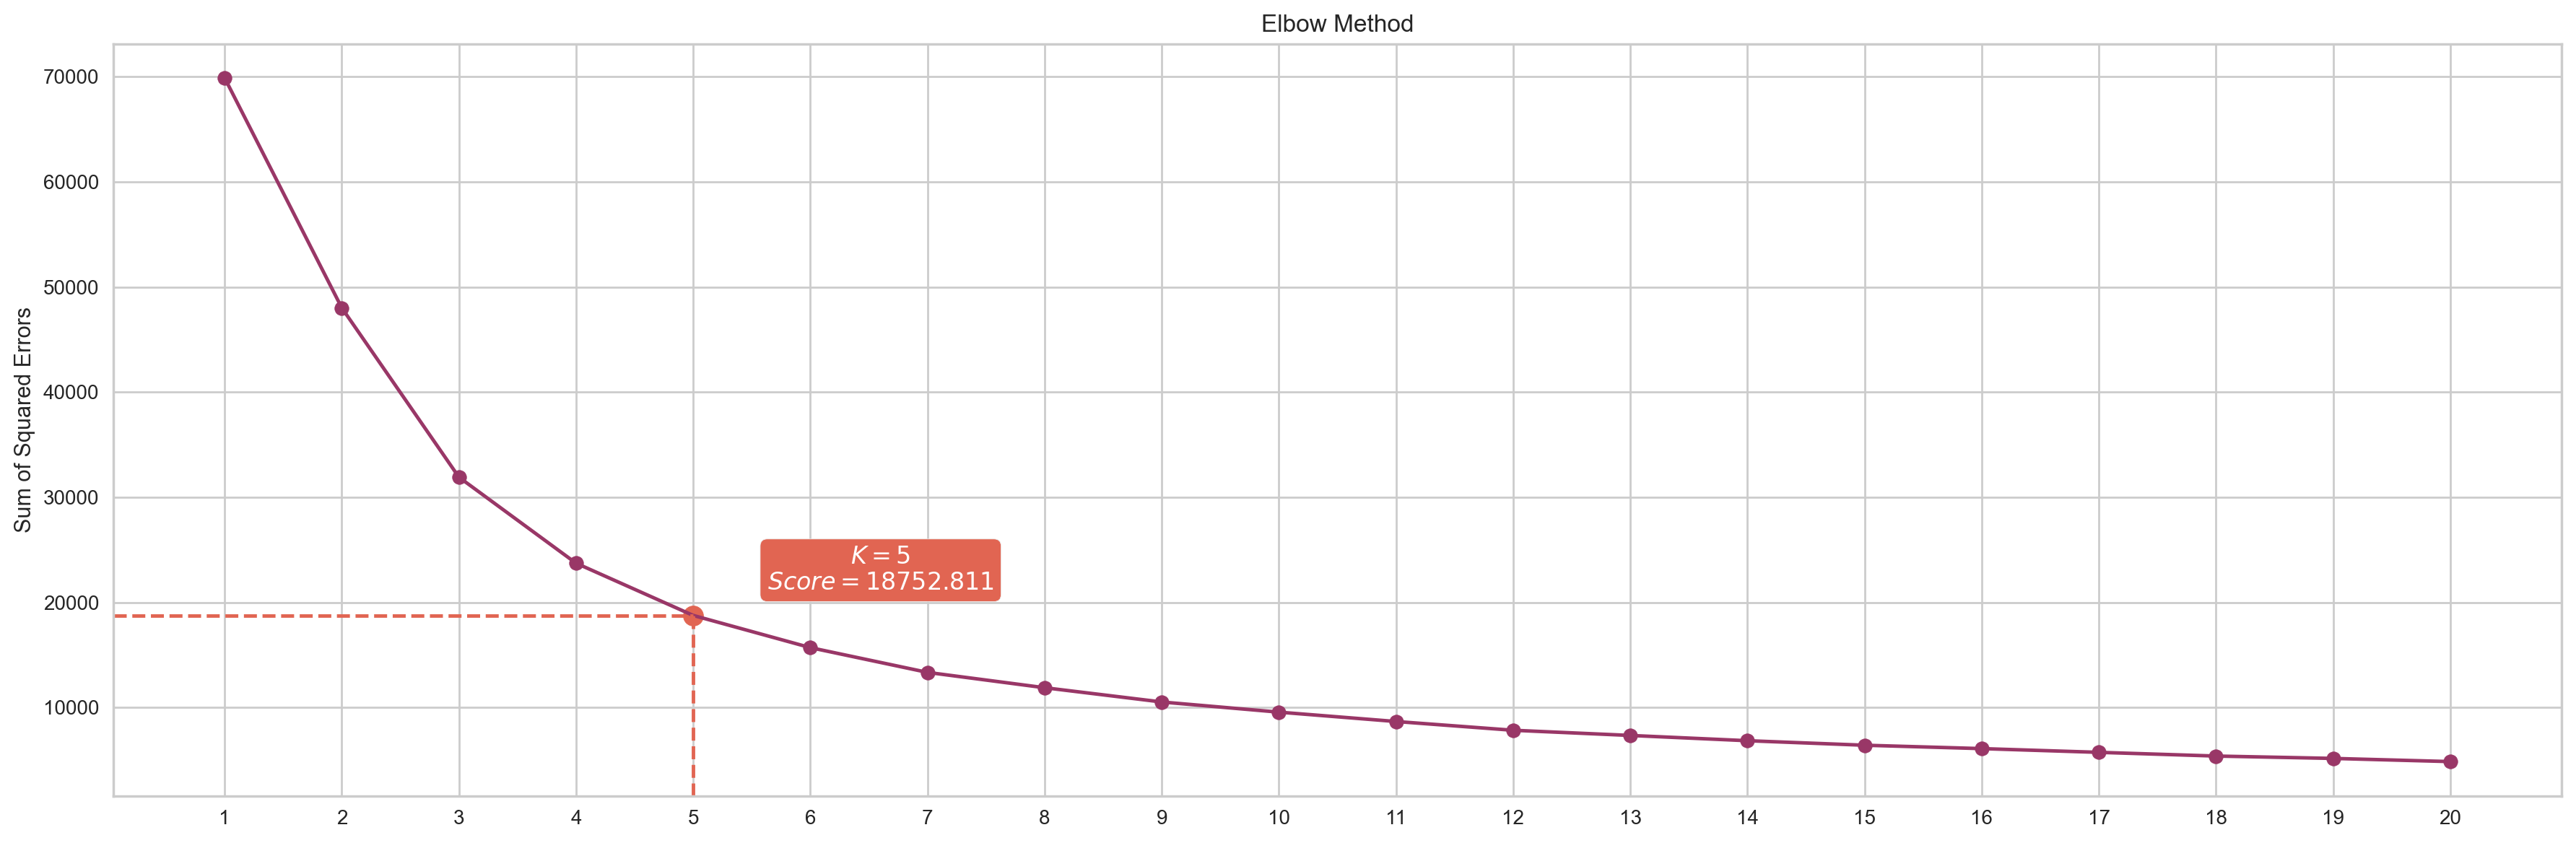

In [20]:
start = 1
end = 20

fig,ax = plt.subplots(figsize=(18,6),dpi=200,sharex=True)

ax.plot(range(start,end + 1),scores[0],color="#993767")
ax.scatter(range(start,end + 1),scores[0],color="#993767")
ax.scatter(elbows_indexes[0],elbows_scores[0],color="#e16552",s=100)
ax.set_xticks(range(start,end + 1))

xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.plot((xmin,elbows_indexes[0]),(elbows_scores[0],elbows_scores[0]),color="#e16552",linestyle="--")
ax.plot((elbows_indexes[0],elbows_indexes[0]),(ymin,elbows_scores[0]),color="#e16552",linestyle="--")
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title("Elbow Method")
ax.set_ylabel("Sum of Squared Errors")
ax.text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_000,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#e16552",boxstyle="round"),
)

plt.tight_layout()
plt.show()

Using the silhouette plot, the optimal k is found to be 2.

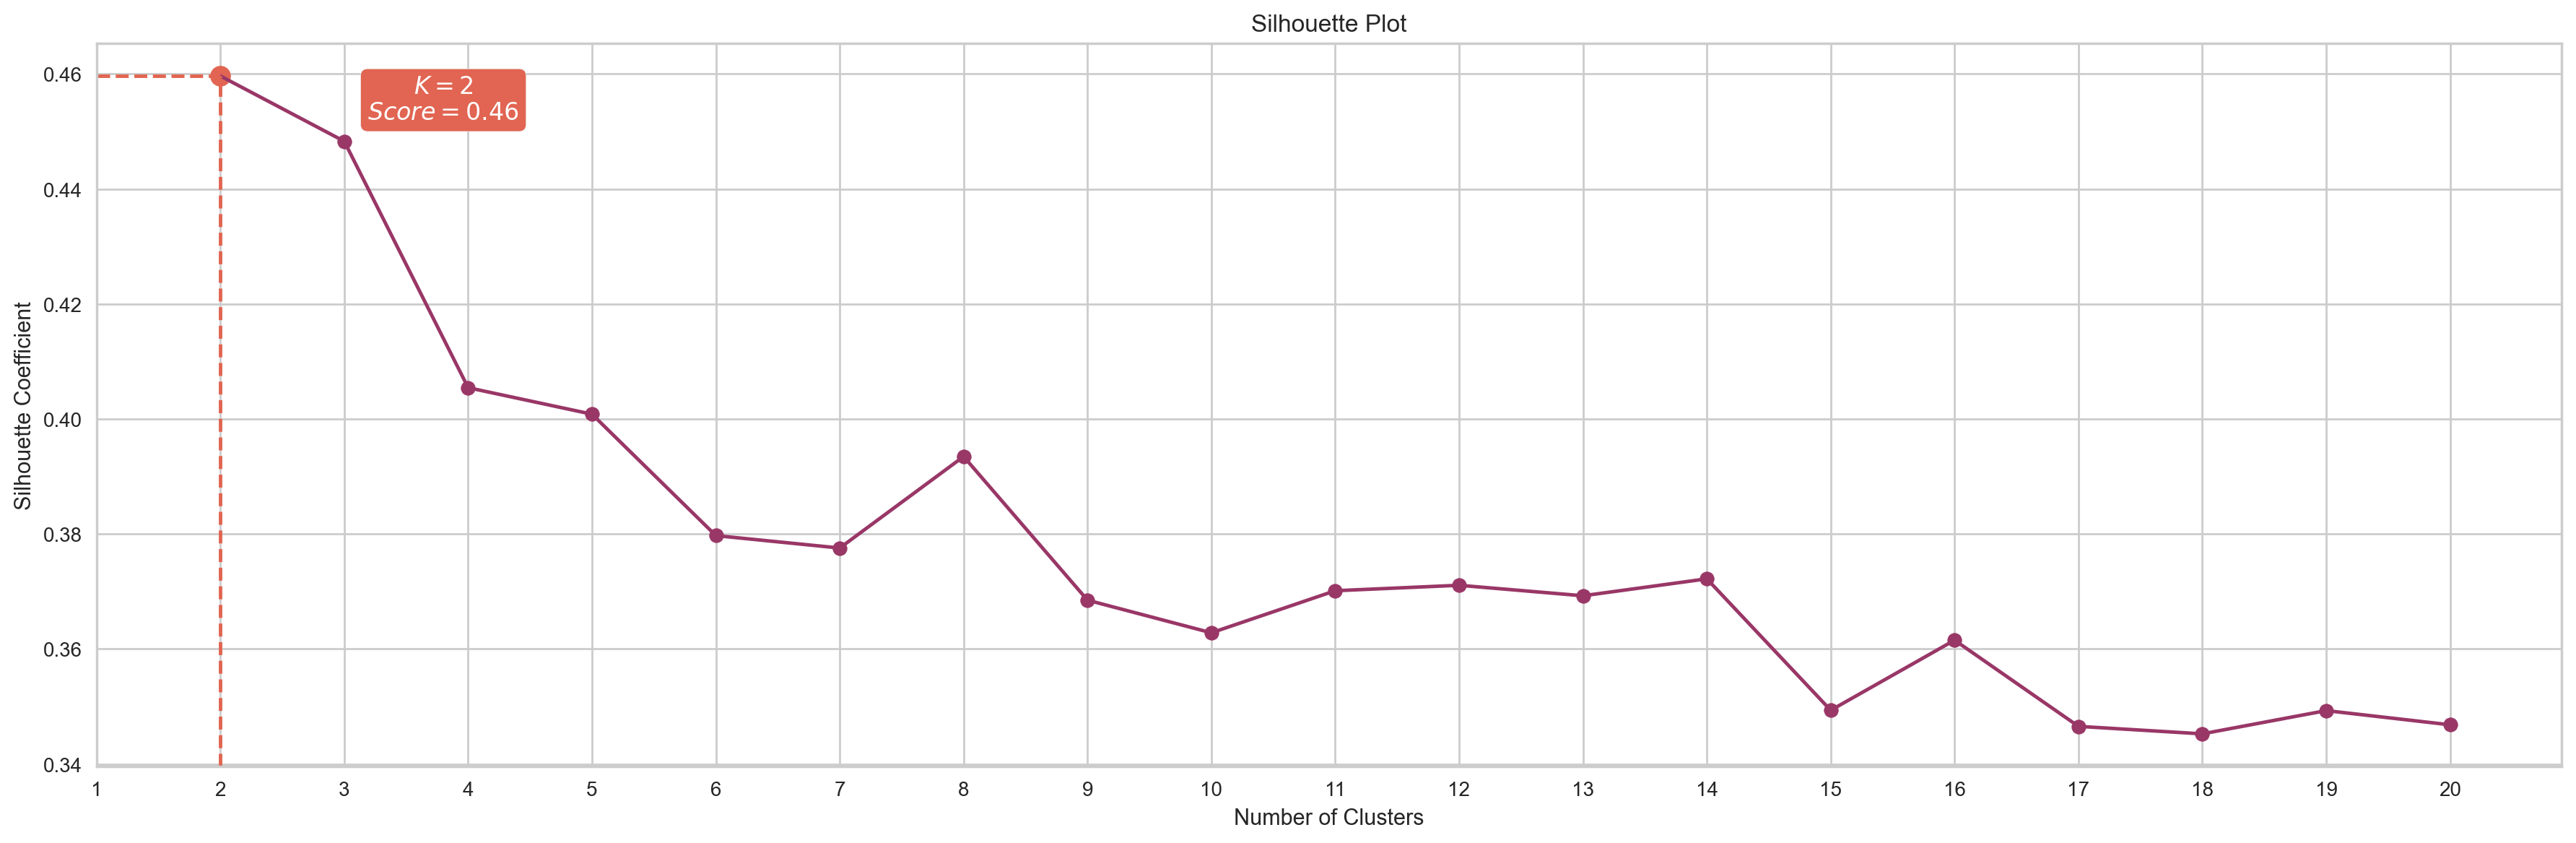

In [21]:
start = 1
end = 20

fig,ax = plt.subplots(figsize=(18,6),dpi=200,sharex=True)


ax.plot(range(start + 1,end + 1),scores[1],color="#993767")
ax.scatter(range(start + 1,end + 1),scores[1],color="#993767")
ax.scatter(elbows_indexes[1],elbows_scores[1],color="#e16552",s=100)
ax.set_xticks(range(start,end + 1))

xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.plot((xmin,elbows_indexes[1]),(elbows_scores[1],elbows_scores[1]),color="#e16552",linestyle="--")
ax.plot((elbows_indexes[1],elbows_indexes[1]),(ymin,elbows_scores[1]),color="#e16552",linestyle="--")
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title("Silhouette Plot")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Coefficient")
ax.text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#e16552",boxstyle="round")
)

plt.tight_layout()
plt.show()

# **Model Definition**

Initializes a KMeans clustering model with 5 clusters

In [22]:
kmeans_5_model = KMeans(n_clusters=5,init="k-means++",random_state=42)

Initializes a KMeans clustering model with 2 clusters

In [23]:
kmeans_2_model = KMeans(n_clusters=2,init="k-means++",random_state=42)

# **Testing Model**

### K-means With 5 Clusters

Applies the KMeans clustering model with 5 clusters to 'pca_df' using the fit method

In [24]:
kmeans_5_model.fit(pca_df)

KMeans(n_clusters=5, random_state=42)

Generates predictions for cluster assignments using the fitted KMeans clustering model

In [25]:
kmeans_5_pred = kmeans_5_model.predict(pca_df)

Retrieves the inertia, a measure of how internally coherent the clusters are, from the fitted KMeans clustering model with 5 clusters

In [26]:
kmeans_5_model.inertia_

18752.835124983627

In the k-means clustering algorithm, the cluster centers are the points that define the center of each cluster. These points are chosen in such a way as to minimize the distance between the data points in the cluster and the cluster center. The k-means algorithm starts by selecting a set of initial cluster centers, which can be randomly chosen or specified by the user. The algorithm then iteratively updates the cluster centers by assigning each data point to the closest cluster center and then recalculating the cluster centers as the mean of the data points in the cluster. This process is repeated until convergence, which is when the cluster centers stop changing or the difference between the within-cluster sum of squares between two consecutive iterations is below a certain threshold.

In [27]:
clusters_5 = []
for iteration in range(1,kmeans_5_model.n_iter_ + 1):
    temp_model = KMeans(n_clusters=5,init="k-means++",random_state=random_state,max_iter=iteration)
    temp_model.fit(pca_df)
    clusters_5.append(np.transpose(temp_model.cluster_centers_))

first_index = sum([[f"Iteration_{iteration}" for component in range(pca_df.shape[1])] for iteration in range(1,kmeans_5_model.n_iter_ + 1)],[])
second_index = [f"P{component + 1}" for component in range(pca_df.shape[1])] * kmeans_5_model.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index,second_index])

iteration_history_5 = pd.DataFrame(
    data=np.ravel(clusters_5).reshape(-1,kmeans_5_model.n_clusters),
    columns=[f"Cluster {cluster+1}" for cluster in range(5)],
    index=multi_index
)
iteration_history_5

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Iteration_1  P1  -1.321095   3.523320  -0.158347   0.348070  14.818988
             P2   0.226692  -0.296303   4.420132  -1.379542   4.056457
Iteration_2  P1  -1.405413   3.571321  -0.376355   0.307687  14.092342
             P2   0.228667  -0.131157   4.166311  -1.320760   3.440194
Iteration_3  P1  -1.438965   3.557018  -0.445609   0.302224  13.658912
             P2   0.195149  -0.106269   4.013264  -1.297389   3.223828
Iteration_4  P1  -1.451238   3.531931  -0.490564   0.302903  13.242149
             P2   0.162866  -0.112978   3.913762  -1.288653   3.121783
Iteration_5  P1  -1.456915   3.511006  -0.515724   0.304580  12.930554
             P2   0.141002  -0.125072   3.853652  -1.284662   3.088848
Iteration_6  P1  -1.460500   3.494595  -0.531204   0.306351  12.795720
             P2   0.123615  -0.129038   3.810112  -1.283264   3.026232
Iteration_7  P1  -1.463836   3.485294  -0.540672   0.308167  12.655549
             P2   0.111439  -0.131222   3.775083  -1.282620   3.000094
Iteration_8  P1  -1.466222   3.480945  -0.544253   0.309827  12.591479
             P2   0.101174  -0.134787   3.745351  -1.282526   2.976741
Iteration_9  P1  -1.466871   3.471929  -0.555170   0.312924  12.465763
             P2   0.088651  -0.137776   3.715704  -1.282545   2.932539
Iteration_10 P1  -1.467851   3.465702  -0.559774   0.313922  12.465763
             P2   0.079405  -0.139898   3.694361  -1.283492   2.932539
Iteration_11 P1  -1.467344   3.464033  -0.565243   0.314948  12.465763
             P2   0.074104  -0.140105   3.682738  -1.284164   2.932539
Iteration_12 P1   0.307071   3.438989  12.229803  -0.554187  -1.469580
             P2  -1.283563  -0.149141   2.840896   3.704165   0.086301
Iteration_13 P1   0.311260   3.437744  12.173881  -0.562909  -1.468749
             P2  -1.283542  -0.149531   2.819076   3.685862   0.077040
Iteration_14 P1   0.313331   3.432925  12.124838  -0.567569  -1.467436
             P2  -1.284303  -0.149498   2.780581   3.677774   0.072383
Iteration_15 P1   0.314534   3.432925  12.124838  -0.568558  -1.467488
             P2  -1.284461  -0.149498   2.780581   3.672487   0.069694

Creates a DataFrame containing the cluster centers of the fitted KMeans model with 5 clusters. Each column of the DataFrame represents a principal component, and each row corresponds to a cluster, labeled as "Cluster 1," "Cluster 2," etc.

In [28]:
final_clust_5 = pd.DataFrame(
                        data=kmeans_5_model.cluster_centers_,
                        columns=pca_df.columns,
                        index=[f"Cluster {cluster_5+1}" for cluster_5 in range(kmeans_5_model.n_clusters)]
                        ).T
final_clust_5

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
P1,0.314534,3.432925,12.124838,-0.568558,-1.467488
P2,-1.284461,-0.149498,2.780581,3.672487,0.069694


Assign data points to clusters and calculate the distance between the data points and the cluster centers.

In [29]:
df_labeled_clust_5 = pca_df.copy()
df_labeled_clust_5["Cluster"] = kmeans_5_model.labels_+1
df_labeled_clust_5["Distance"] = np.min(kmeans_5_model.transform(pca_df),axis=1)
df_labeled_clust_5.head()

,P1,P2,Cluster,Distance
0,-1.696396,-1.122582,5,1.214051
1,-1.215679,2.435636,4,1.395910
2,0.935851,-0.385206,1,1.093022
3,-1.614639,-0.724585,5,0.807794
4,0.223699,-0.783613,1,0.509018


Visualize the number of data points in each cluster.

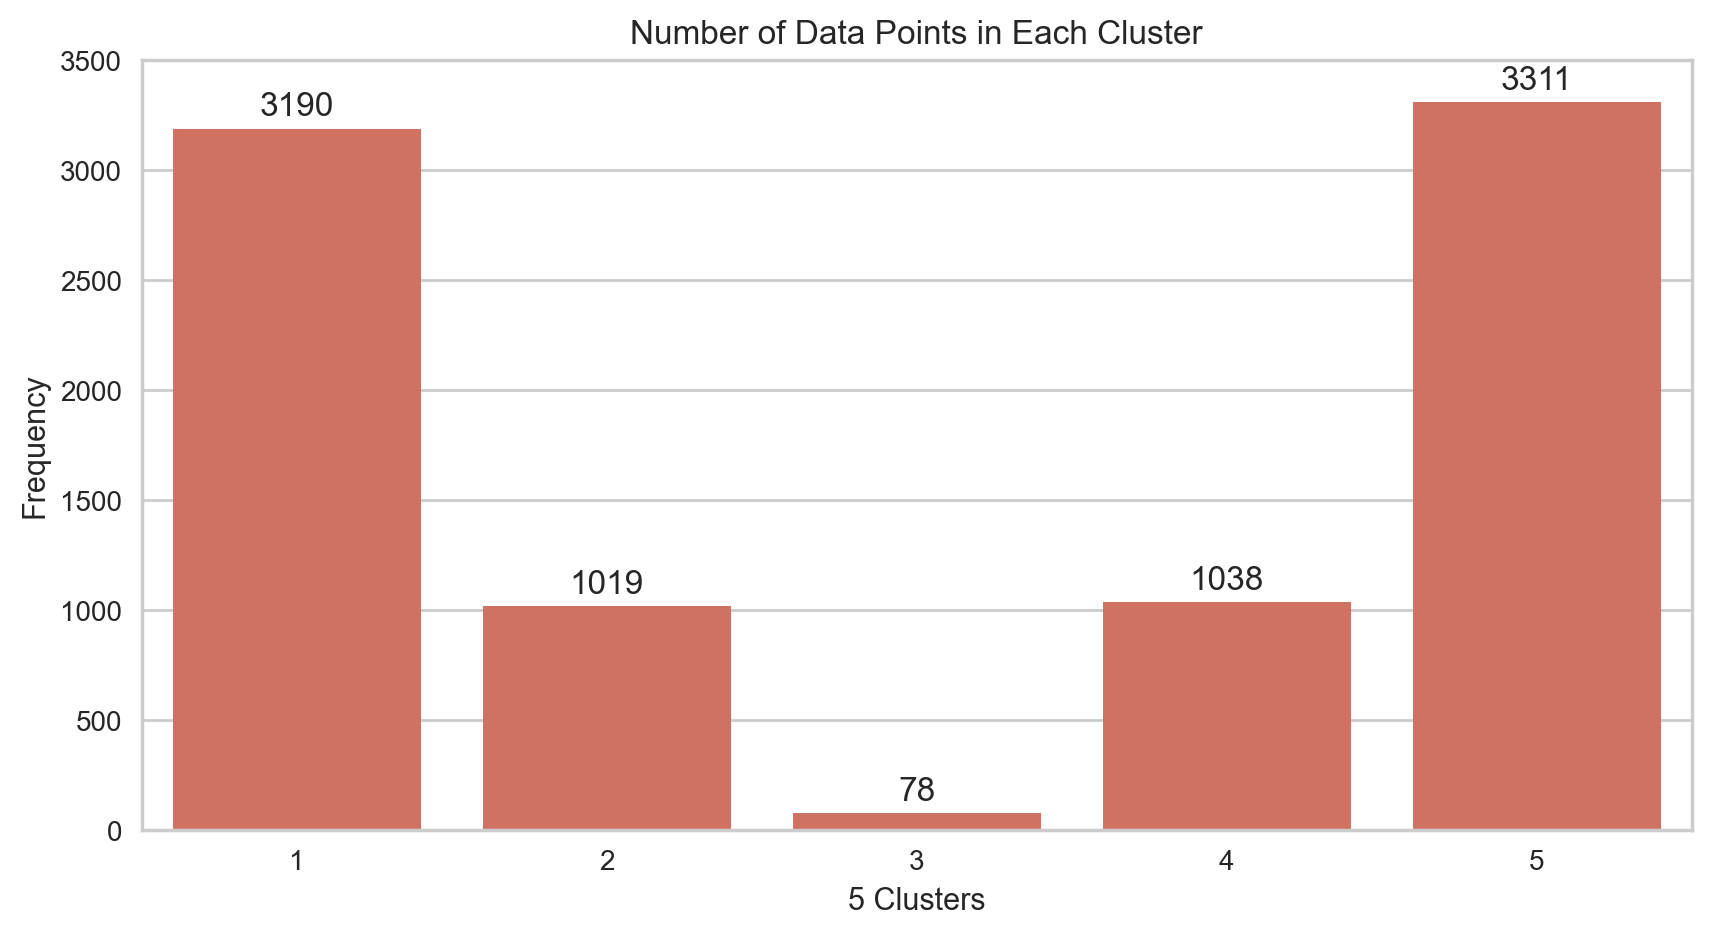

In [30]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled_clust_5,x="Cluster",color="#e16552")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_xlabel("5 Clusters")
ax.set_ylabel("Frequency")
ax.set_ylim(0,3500)

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

### K-means With 2 Clusters

Applies the KMeans clustering model with 2 clusters to 'pca_df' using the fit method

In [31]:
kmeans_2_model.fit(pca_df)

KMeans(n_clusters=2, random_state=42)

Generates predictions for cluster assignments using the fitted KMeans clustering model

In [32]:
kmeans_2_pred = kmeans_2_model.predict(pca_df)

Retrieves the inertia, a measure of how internally coherent the clusters are, from the fitted KMeans clustering model with 2 clusters

In [33]:
kmeans_2_model.inertia_

48011.816653319474

In the k-means clustering algorithm, the cluster centers are the points that define the center of each cluster. These points are chosen in such a way as to minimize the distance between the data points in the cluster and the cluster center. The k-means algorithm starts by selecting a set of initial cluster centers, which can be randomly chosen or specified by the user. The algorithm then iteratively updates the cluster centers by assigning each data point to the closest cluster center and then recalculating the cluster centers as the mean of the data points in the cluster. This process is repeated until convergence, which is when the cluster centers stop changing or the difference between the within-cluster sum of squares between two consecutive iterations is below a certain threshold.

In [34]:
clusters_2 = []
for iteration in range(1,kmeans_2_model.n_iter_ + 1):
    temp_model = KMeans(n_clusters=2,init="k-means++",random_state=random_state,max_iter=iteration)
    temp_model.fit(pca_df)
    clusters_2.append(np.transpose(temp_model.cluster_centers_))

first_index = sum([[f"Iteration_{iteration}" for component in range(pca_df.shape[1])] for iteration in range(1,kmeans_2_model.n_iter_ + 1)],[])
second_index = [f"P{component + 1}" for component in range(pca_df.shape[1])] * kmeans_2_model.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index,second_index])

iteration_history_2 = pd.DataFrame(
    data=np.ravel(clusters_2).reshape(-1,kmeans_2_model.n_clusters),
    columns=[f"Cluster {cluster+1}" for cluster in range(2)],
    index=multi_index
)
iteration_history_2

Cluster 1  Cluster 2
Iteration_1 P1  -0.645602   3.710196
            P2  -0.128096   0.736153
Iteration_2 P1  -0.685080   3.671584
            P2   0.001833  -0.009822
Iteration_3 P1  -0.711268   3.554363
            P2  -0.020330   0.101594
Iteration_4 P1  -0.721855   3.504546
            P2  -0.024427   0.118592
Iteration_5 P1  -0.727502   3.477792
            P2  -0.024919   0.119125
Iteration_6 P1  -0.732219   3.455490
            P2  -0.025836   0.121927
Iteration_7 P1  -0.734874   3.443120
            P2  -0.025924   0.121462

Creates a DataFrame containing the cluster centers of the fitted KMeans model with 2 clusters. Each column of the DataFrame represents a principal component, and each row corresponds to a cluster, labeled as "Cluster 1," and "Cluster 2,".

In [35]:
final_clust_2 = pd.DataFrame(
                        data=kmeans_2_model.cluster_centers_,
                        columns=pca_df.columns,
                        index=[f"Cluster {cluster_2+1}" for cluster_2 in range(kmeans_2_model.n_clusters)]
                        ).T
final_clust_2

,Cluster 1,Cluster 2
P1,-0.734874,3.443120
P2,-0.025924,0.121462


Assign data points to clusters and calculate the distance between the data points and the cluster centers.

In [36]:
df_labeled_clust_2 = pca_df.copy()
df_labeled_clust_2["Cluster"] = kmeans_2_model.labels_+1
df_labeled_clust_2["Distance"] = np.min(kmeans_2_model.transform(pca_df),axis=1)
df_labeled_clust_2.head()

,P1,P2,Cluster,Distance
0,-1.696396,-1.122582,1,1.458486
1,-1.215679,2.435636,1,2.508078
2,0.935851,-0.385206,1,1.708920
3,-1.614639,-0.724585,1,1.123438
4,0.223699,-0.783613,1,1.221866


Visualize the number of data points in each cluster.

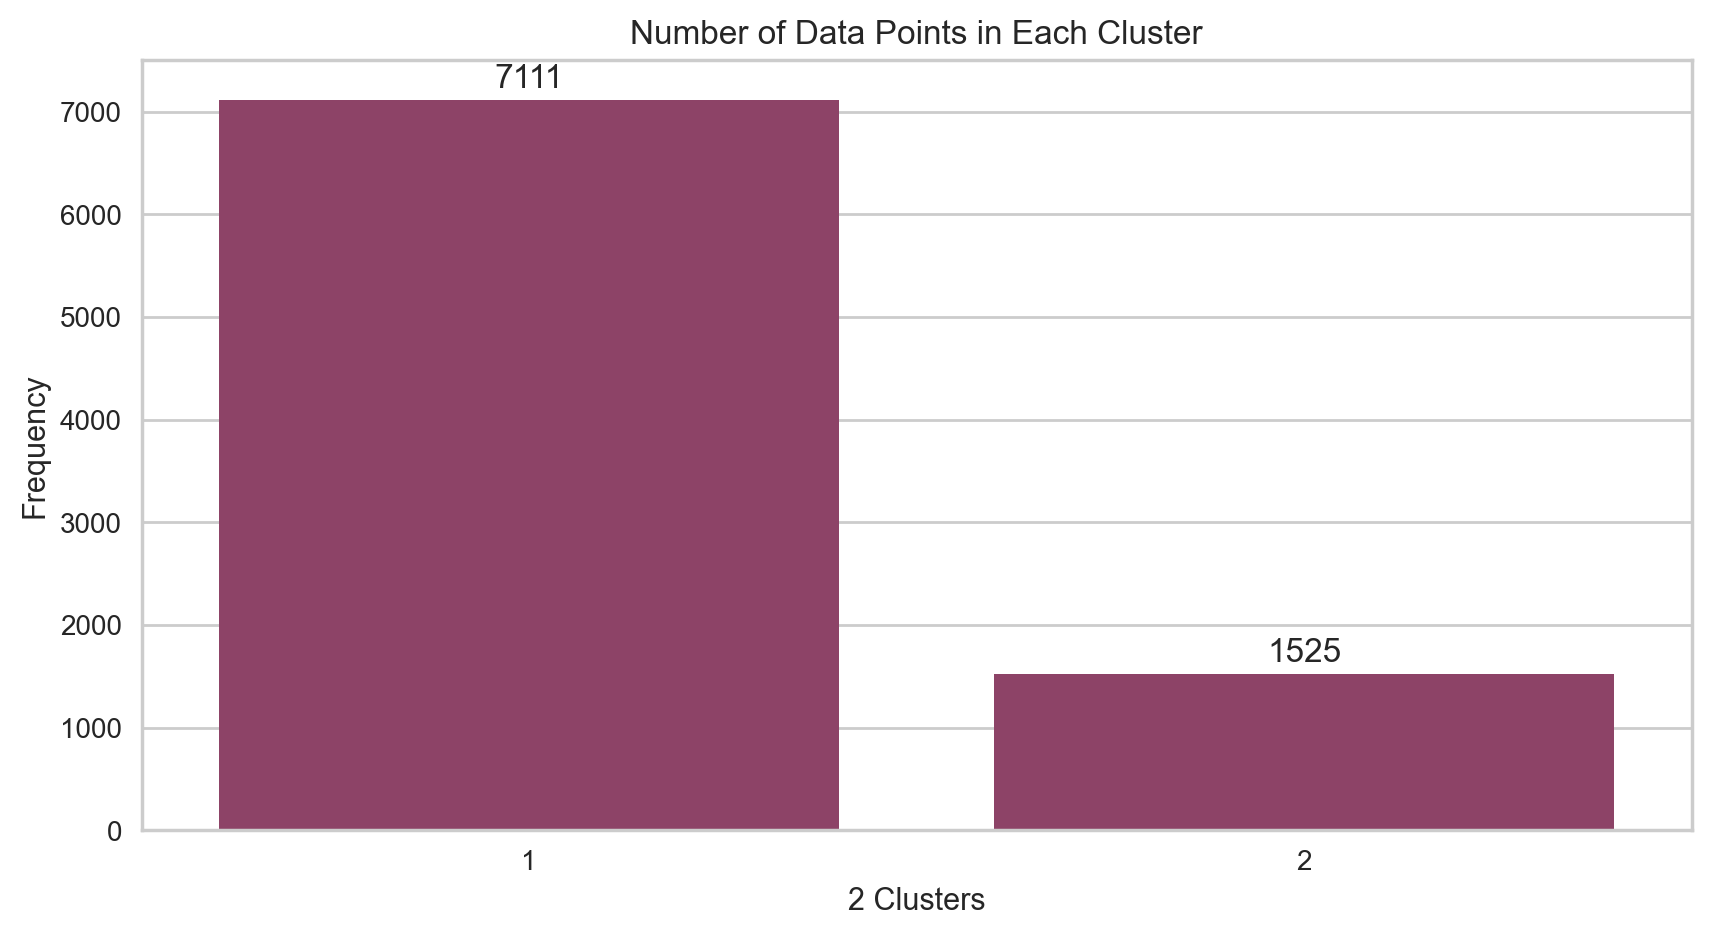

In [37]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled_clust_2,x="Cluster",color="#993767")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_xlabel("2 Clusters")
ax.set_ylabel("Frequency")
ax.set_ylim(0,7500)

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

# **Evaluating Model**

It's important to note that unsupervised machine learning techniques, such as k-means clustering, do not have a "right" or "wrong" answer. Unlike supervised learning techniques, which are trained on labeled data and can be evaluated using metrics such as accuracy, unsupervised learning techniques do not have ground truth labels to compare their predictions to.

In an ANOVA table for k-means clustering, the F-value and p-value are used to determine whether the difference between the means of the clusters is statistically significant. The F-value is the ratio of the mean squares between the groups (i.e., the clusters) to the mean squares within the groups, while the p-value is the probability that the difference between the means of the clusters is due to chance. Since the F-value for the clusters is significantly large and the p-value for the clusters is small (typically less than 0.05), it suggests that there is a statistically significant difference between the means of the clusters. This may indicate that the clusters are distinct and meaningful.

### **Anova for K-means With 5 Clusters**

One-way ANOVA (Analysis of Variance) test for each principal component across the clusters assigned by a KMeans model with 5 clusters.

In [38]:
stats,p_values = [],[]
for feature in pca_df.columns:
    groups = [pca_df[feature][kmeans_5_model.labels_ == label] for label in range(kmeans_5_model.n_clusters)]
    stat,p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(data=[stats,p_values],
                     columns=[f"P{component + 1}" for component in range(2)],
                     index=["F-Value 5_Clusters","P-Value"]
                     ).T
anova

,F-Value 5_Clusters,P-Value
P1,7734.726568,0.0
P2,4275.486150,0.0


Visualize the clustering of data points based on their features using a scatter plot.

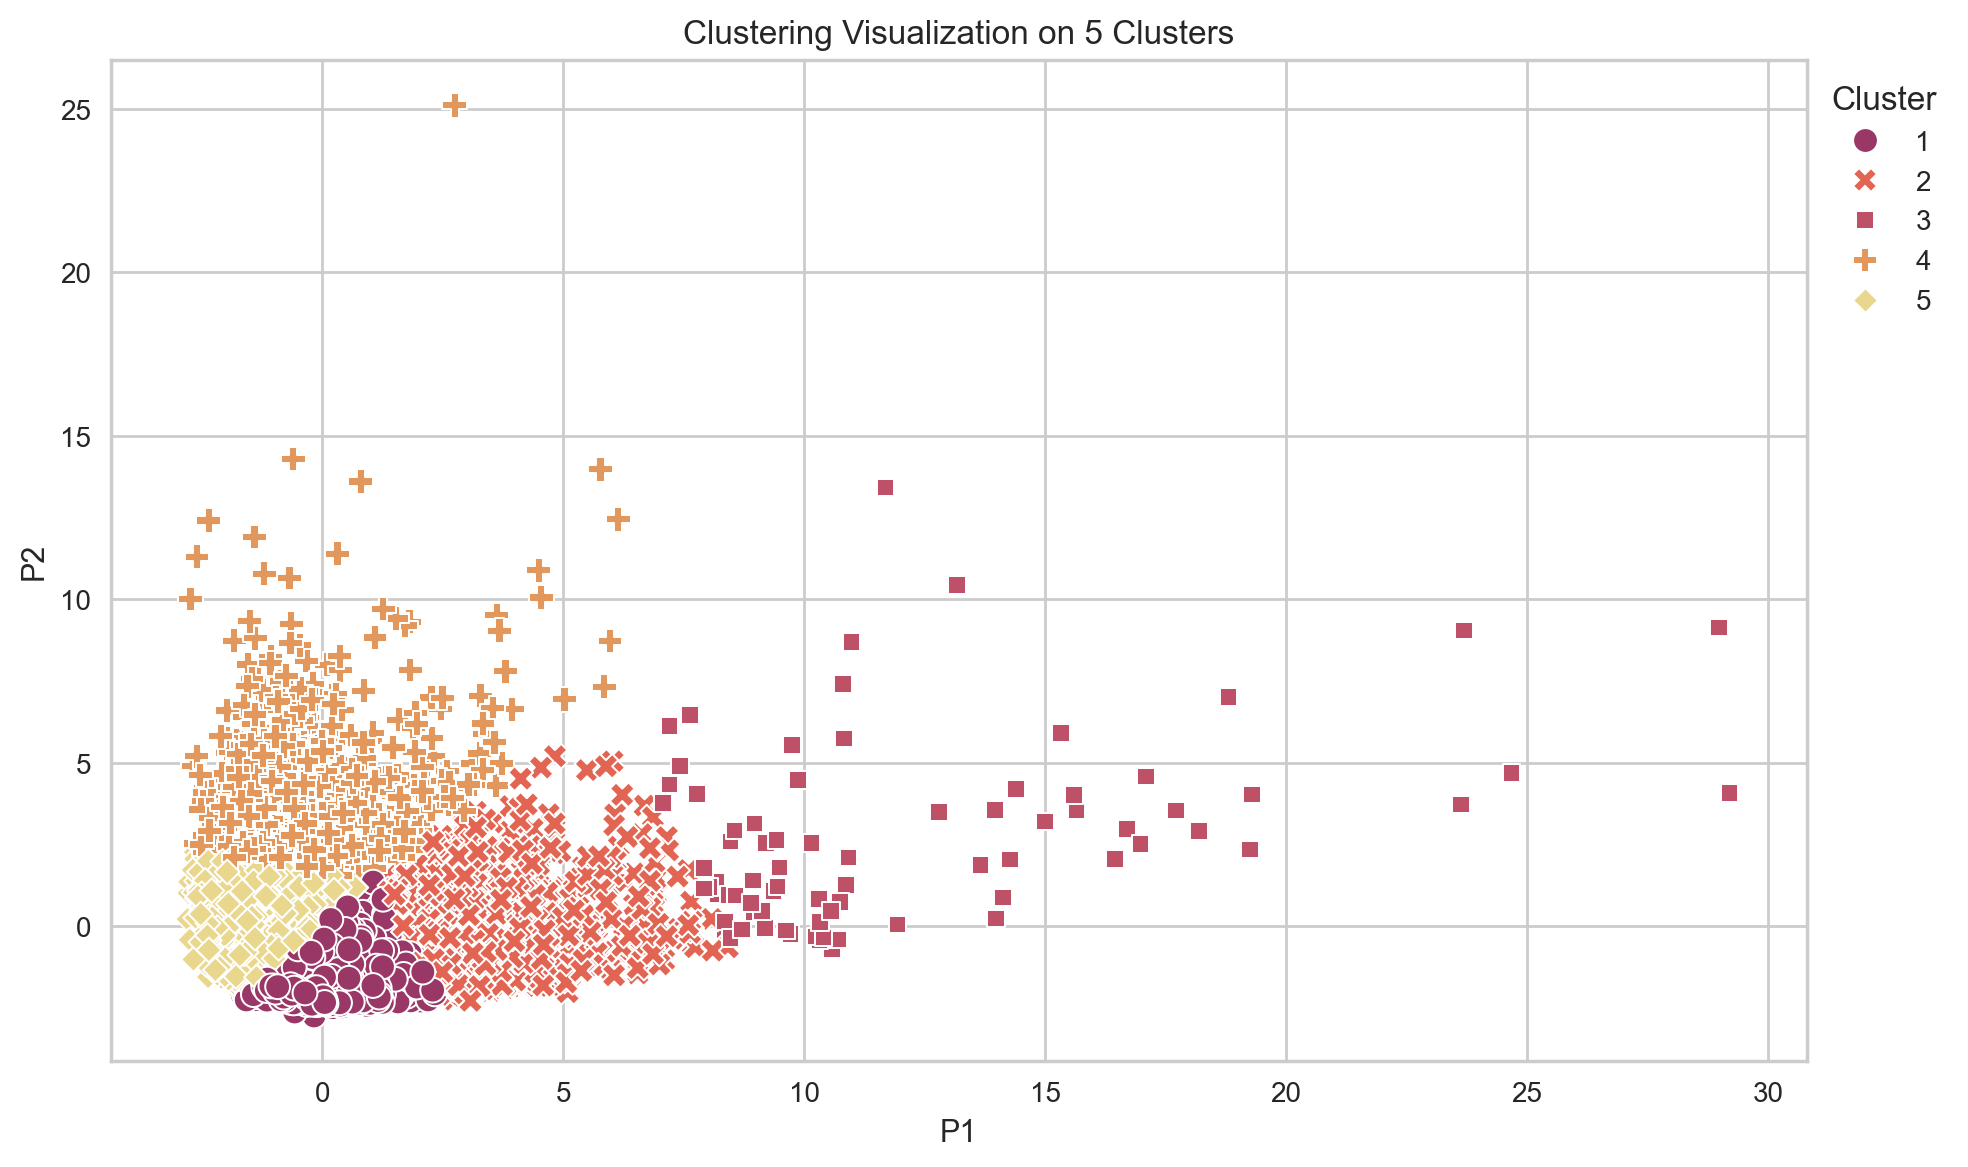

In [39]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)


sns.scatterplot(data=df_labeled_clust_5,
                x="P1",
                y="P2",
                ax=ax,
                hue="Cluster",
                style="Cluster",
                s=80,
                palette=["#993767","#e16552","#be5168","#e2975d","#e9d78e"]
                )

ax.legend(bbox_to_anchor=(1, 1), loc="upper left", title="Cluster")
plt.title("Clustering Visualization on 5 Clusters")
plt.tight_layout()
plt.show()


### **Anova for K-means With 2 Clusters**

One-way ANOVA (Analysis of Variance) test for each principal component across the clusters assigned by a KMeans model with 2 clusters.

In [40]:
stats,p_values = [],[]
for feature in pca_df.columns:
    groups = [pca_df[feature][kmeans_2_model.labels_ == label] for label in range(kmeans_2_model.n_clusters)]
    stat,p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(data=[stats,p_values],
                     columns=[f"P{component + 1}" for component in range(2)],
                     index=["F-Value 2_Clusters","P-Value"]
                     ).T
anova

,F-Value 2_Clusters,P-Value
P1,10410.265161,0.000000
P2,7.275024,0.007006


Visualize the clustering of data points based on their features using a scatter plot.

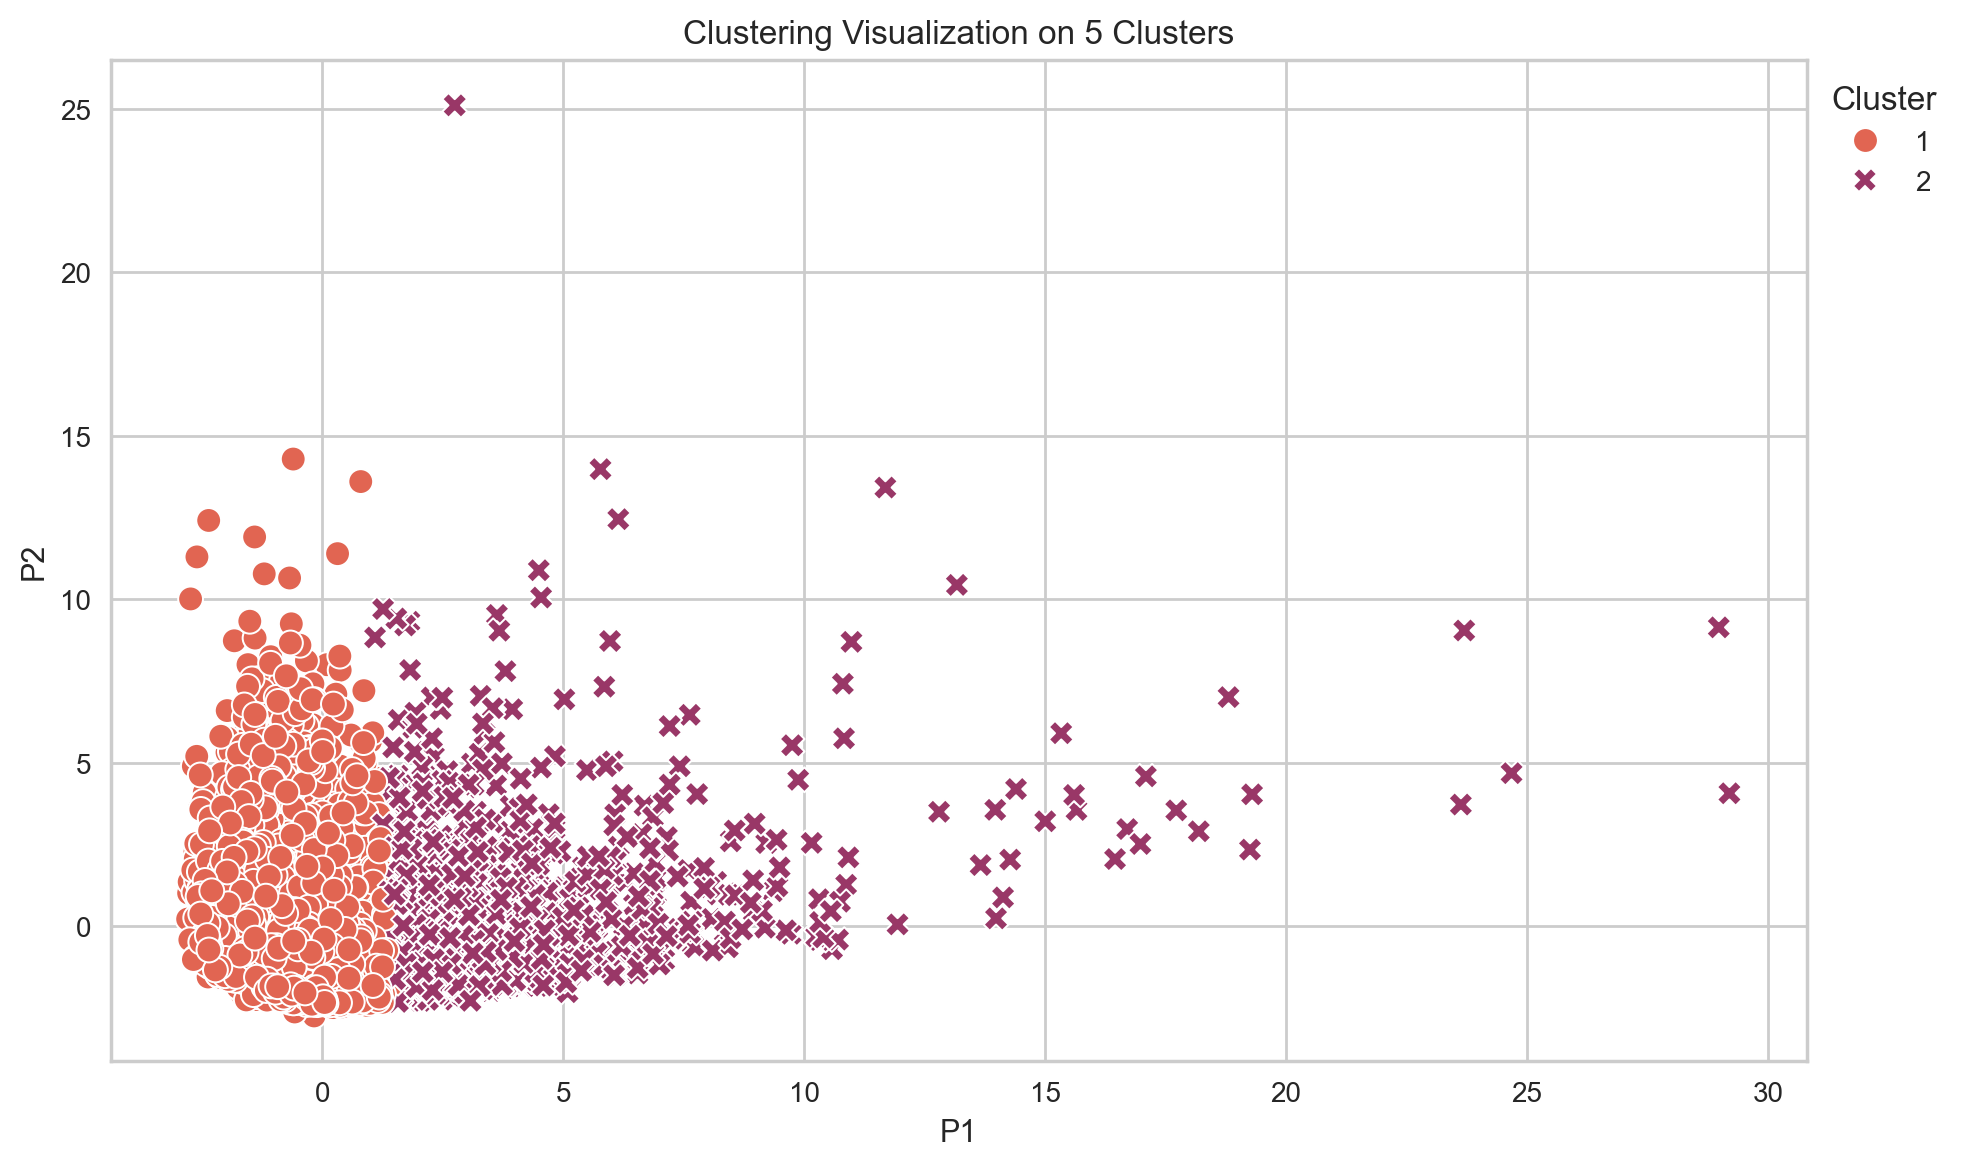

In [41]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)


sns.scatterplot(data=df_labeled_clust_2,
                x="P1",
                y="P2",
                ax=ax,
                hue="Cluster",
                style="Cluster",
                s=80,
                palette=["#e16552","#993767"]
                )

ax.legend(bbox_to_anchor=(1, 1), loc="upper left", title="Cluster")
plt.title("Clustering Visualization on 5 Clusters")
plt.tight_layout()
plt.show()

Save the models for deployment and future use.

In [42]:
with open('kmeans_5.pkl', 'wb') as kmeans_5_file:
    pickle.dump({'model': kmeans_5_model, 'scaler': scaler}, kmeans_5_file)

with open('kmeans_2.pkl', 'wb') as kmeans_2_file:
    pickle.dump({'model': kmeans_2_model, 'scaler': scaler}, kmeans_2_file)

# **Conclusion**

Following the K-means clustering analysis on the credit card customer dataset, we've successfully identified two and five distinct user groups based on their spending patterns and payment behaviors. These findings underscore the effective segmentation of credit card customers by their shopping and payment tendencies. Moreover, the clusters formed hold promise for targeted marketing strategies and risk assessment efforts. The ANOVA results for both the 2-cluster and 5-cluster models confirm the appropriateness of the clusters, suggesting they effectively capture distinct customer behaviors. While further analysis may delve deeper into each cluster's characteristics and needs, this research provides a robust foundation for future explorations in this domain.